In [13]:
import pandas as pd

df = pd.read_csv('/Users/maazhussain/Desktop/Projects/Customer Segmentation/mall_customers_full.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,49,68,69
1,2,Female,56,22,47
2,3,Male,66,41,94
3,4,Male,69,41,62
4,5,Male,49,112,69


In [17]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


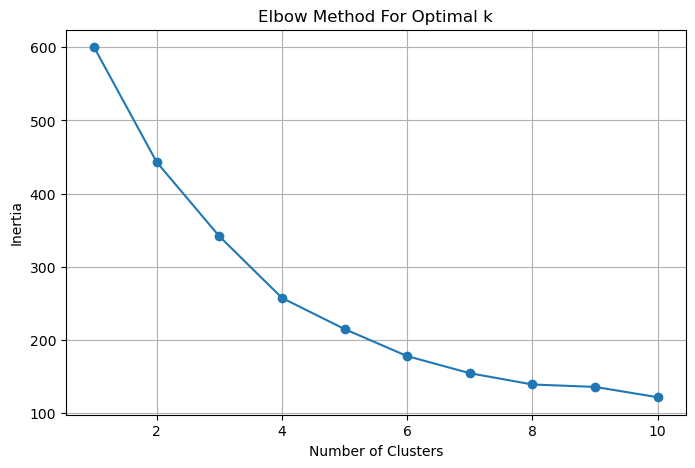

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [34]:
from sklearn.cluster import KMeans

# Apply KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Preview clustered data
df[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,49,68,69,3
1,2,56,22,47,0
2,3,66,41,94,3
3,4,69,41,62,0
4,5,49,112,69,3


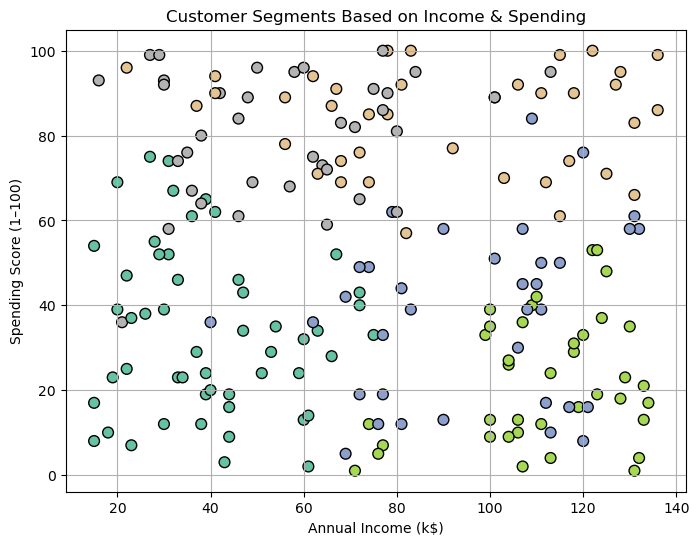

In [36]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['Cluster'],
    cmap='Set2',
    s=60,
    edgecolors='k'
)

plt.title('Customer Segments Based on Income & Spending')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.grid(True)
plt.show()


In [38]:
# Summary stats for each cluster
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)

# Add customer count per cluster
cluster_summary['Count'] = df['Cluster'].value_counts().sort_index()

cluster_summary


,Age,Annual Income (k$),Spending Score (1-100),Count
Cluster,,,,
0,50.4,39.9,33.8,52
1,25.6,96.4,38.3,35
2,54.7,111.4,22.4,38
3,56.1,89.0,83.7,37
4,31.8,56.7,80.7,38


📊 Customer Segmentation with Clustering – Final Report

🧭 Objective
The goal of this project was to segment customers into meaningful groups based on their demographics and spending behaviors. This segmentation allows businesses to tailor marketing strategies, optimize offerings, and improve customer engagement.

🧹 Data Overview & Preprocessing
Dataset: Mall Customers (200 records)
Key Features Selected:
Age
Annual Income (k$)
Spending Score (1-100)
Standardization was applied using StandardScaler to ensure each feature contributed equally to the clustering algorithm.

🔍 Clustering Approach
➤ Elbow Method

To determine the optimal number of clusters, the Elbow Method was applied by plotting inertia for k = 1 to 10.
📍 The elbow appeared at k = 5, indicating five distinct customer segments.

➤ K-Means Clustering

Applied KMeans with n_clusters = 5
Each customer was assigned to a cluster based on similarities in spending and income behavior
📈 Visual Insights
A scatter plot was created using:

X-axis: Annual Income (k$)
Y-axis: Spending Score (1-100)
Color-coded by cluster labels
This visualization revealed clear separation between high-spending and low-spending groups, as well as income-based differences.

🧠 Cluster Summary

Cluster	Avg Age	Avg Income (k$)	Avg Spending Score	Count	Description
0	50.4	39.9	33.8	52	Budget-conscious older group
1	25.6	96.4	38.3	35	High-income, moderate spenders
2	54.7	111.4	22.4	38	Affluent but cautious
3	56.1	89.0	83.7	37	Wealthy high-value customers
4	31.8	56.7	80.7	38	Young and enthusiastic spenders

✅ Conclusion
This clustering model revealed five distinct customer segments, each with unique behavioral and financial profiles. The segmentation can help businesses:

Identify high-value customers

Target young spenders with promotions

Design retention strategies for mid-range and cautious customers

In [44]:
# Export the full clustering data
df.to_csv("customer_segmentation_dashboard.csv", index=False)
